**FACE RECOGNITION**

In [1]:
import os
import cv2 as cv
import numpy as np

p = []

for i in os.listdir('faces/train'):
    p.append(i)

In [2]:
features = []
labels = []

haar_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

# CREATE TRAIN
for person in p:
    path = os.path.join('faces\\train', person)
    for im in os.listdir(path):
        imPath = os.path.join(path, im)
        img = cv.imread(imPath)
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        
        faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 4)
        
        for (x, y, w, h) in faces_rect:
            faces_roi = gray[y: y+h, x: x+w]
            features.append(faces_roi)
            labels.append(p.index(person))
        
len(features), len(labels)

(100, 100)

In [3]:
features = np.array(features, dtype='object')
labels   = np.array(labels)

face_recognizer = cv.face.LBPHFaceRecognizer_create()

face_recognizer.train(features, labels)

In [4]:
face_recognizer.save('face_recognizer.yml')
np.save('face_recognizer_features.npy', features)
np.save('face_recognizer_labels.npy', labels)

### **TRAINING IS DONE**

In [5]:
haar_cascade = cv.CascadeClassifier('haar_faces.xml')

In [6]:
features = np.load('face_recognizer_features.npy', allow_pickle=True)
labels = np.load('face_recognizer_labels.npy', allow_pickle=True)

len(features), len(labels)

(100, 100)

In [7]:
fr = cv.face.LBPHFaceRecognizer_create()
fr.read('face_recognizer.yml')

In [8]:
peaple = []

for i in os.listdir('faces/train'):
    peaple.append(i)

In [9]:
haar_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

def detect(img):
    
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 4)
    
    for (x, y, w, h) in faces_rect:
        faces_roi = gray[y:y+h, x:x+w]
        
        label, confidence = fr.predict(faces_roi)
        
        cv.putText(img, f'{peaple[label]} {confidence:.2f}%', (20, 20), cv.FONT_HERSHEY_COMPLEX_SMALL, 1.0, (255, 255, 0), 2)
        cv.rectangle(img, (x,y), (x+w, y+h), (255, 255, 0), 2)
        

    return img

In [10]:
predim = cv.imread('faces/val/madonna/3.jpg')
pred = detect(predim)

cv.imshow('pred', pred)

cv.waitKey(0)
cv.destroyAllWindows()

In [11]:
image_paths = []

path = 'faces/val'

for p in os.listdir(path):
    imPath = os.path.join(path, p)
    for im in os.listdir(imPath):
        image_paths.append(os.path.join(imPath, im))

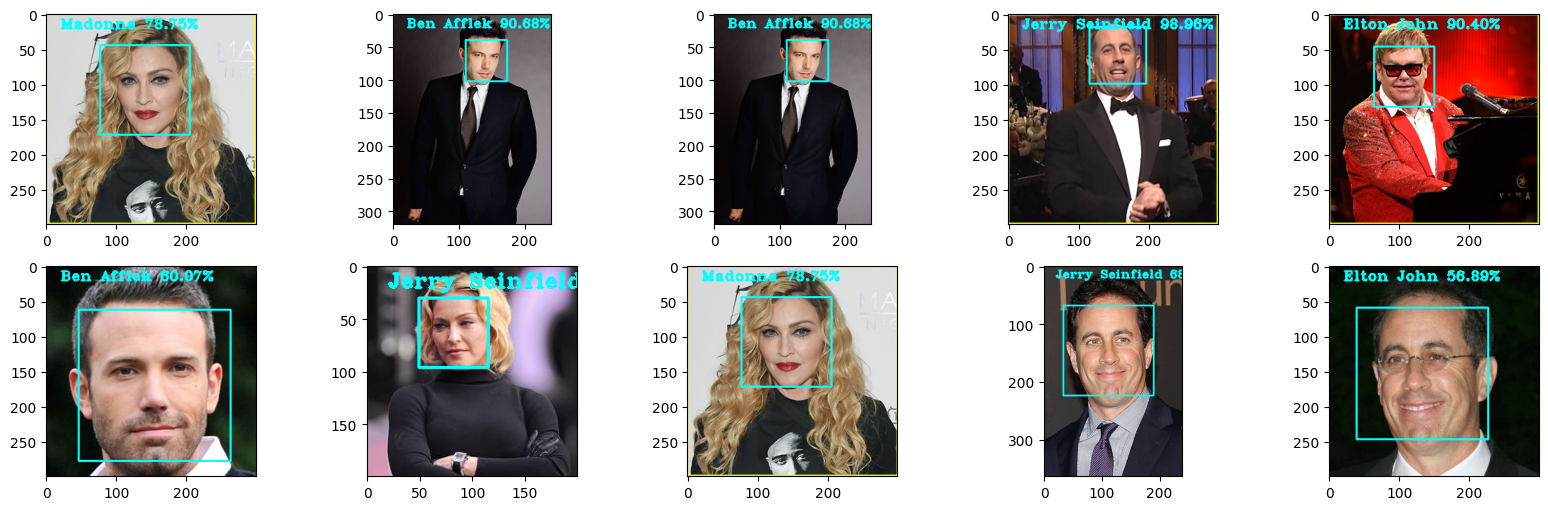

In [14]:
import matplotlib.pyplot as plt

indexes = np.random.choice(len(image_paths), 10, True)

plt.figure(figsize=(20, 6))

for i, index in enumerate(indexes):
    im = cv.imread(image_paths[index])
    image = detect(im)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)    
    
    plt.subplot(2, 5, i+1)
    plt.imshow(image)
